In [1]:
%cd ..

/home/mounim/PHD-Projects/GES


In [2]:
#pip install matplotlib numpy pandas seaborn

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc
from Bio.pairwise2 import format_alignment
from src import dataset_simulator
import networkx as nx
import re

from Bio import pairwise2
from Bio import Align




In [3]:
meta = pd.read_csv('./data/SARS-CoV-2 2020/metadata.tsv',sep = '\t')
meta

,strain,day
0,hCoV_19_Wuhan_IVDC_HB_05_2019,30
1,hCoV_19_England_01_2020,59
2,hCoV_19_Mexico_CMX_InDRE_01_2020,87
3,hCoV_19_Singapore_14Clin_2020,74
4,hCoV_19_USA_MD_HP00010_2020,105
5,hCoV_19_Thailand_Nakhonnayok_2829_2020,103
6,hCoV_19_Canada_NB_219_2020,115
7,hCoV_19_Bangladesh_BCSIR_NILMRC_262_2020,217
8,hCoV_19_USA_WA_S2710_2020,198
9,hCoV_19_England_QEUH_9C9DF4_2020,280


In [6]:

from Bio import pairwise2
from Bio import Align

# 1. pairwise align
version = "SARS-CoV-2 2020"
path = './data/SARS-CoV-2 2020/'

seq_dataset = {}
f = open(path + 'sequences.fasta', 'r').read().split('>')
i = 0 
    
ids = []
for line in f:
    splited = line.split('\n')
    id = splited[0]
    id = re.sub('[^0-9a-zA-Z]+', '_', id)
    seq = "".join(splited[1:])
    seq = seq.replace('\n','')
    # seq = re.sub('[Nn]', '-', seq)
    if(len(seq)  ):

        ids.append(id)
        seq_dataset[id] = seq
len(seq_dataset)

12

In [7]:
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
c = 0
while len(ids) > 1:
    c+=1
    id_ref = ids.pop(0)
    ref = seq_dataset[id_ref]
    for id_tar in ids:
        tar = seq_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end
        scores_df = pd.DataFrame(scores)  
        scores_df.to_csv(path + str(id_tar) + '-' +  str(id_ref) + 'scores.csv')
scores_df = pd.DataFrame(scores)  
scores_df.to_csv(path + 'scores.csv')
print(scores_df)


KeyboardInterrupt: 

In [8]:
scores_df = pd.read_csv(path + 'scores.csv',index_col=0)


In [9]:
for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

,hCoV_19_Wuhan_IVDC_HB_05_2019,hCoV_19_England_01_2020,hCoV_19_Mexico_CMX_InDRE_01_2020,hCoV_19_Singapore_14Clin_2020,hCoV_19_USA_MD_HP00010_2020,hCoV_19_Thailand_Nakhonnayok_2829_2020,hCoV_19_Canada_NB_219_2020,hCoV_19_Bangladesh_BCSIR_NILMRC_262_2020,hCoV_19_USA_WA_S2710_2020,hCoV_19_England_QEUH_9C9DF4_2020,hCoV_19_India_DL_ILBS_279M_2020,hCoV_19_Germany_NW_HHU_321_2020
hCoV_19_Wuhan_IVDC_HB_05_2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_England_01_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_Mexico_CMX_InDRE_01_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_Singapore_14Clin_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_USA_MD_HP00010_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_Thailand_Nakhonnayok_2829_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_Canada_NB_219_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_Bangladesh_BCSIR_NILMRC_262_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_USA_WA_S2710_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV_19_England_QEUH_9C9DF4_2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
path = './data/SARS-CoV-2 2020/'
score_matrix.to_csv(path + 'score_matrix.csv')

NameError: name 'score_matrix' is not defined

In [10]:
score_matrix = pd.read_csv(path + 'score_matrix.csv', index_col=0)

In [11]:
score_matrix

,hCoV_19_England_01_2020,hCoV_19_Mexico_CMX_InDRE_01_2020,hCoV_19_Singapore_14Clin_2020,hCoV_19_USA_MD_HP00010_2020,hCoV_19_Thailand_Nakhonnayok_2829_2020,hCoV_19_Canada_NB_219_2020,hCoV_19_Bangladesh_BCSIR_NILMRC_262_2020,hCoV_19_USA_WA_S2710_2020,hCoV_19_England_QEUH_9C9DF4_2020,hCoV_19_India_DL_ILBS_279M_2020,hCoV_19_Germany_NW_HHU_321_2020
hCoV_19_England_01_2020,0.0,0.3,1.4,0.2,0.2,0.4,0.3,0.2,0.3,0.2,0.3
hCoV_19_Mexico_CMX_InDRE_01_2020,0.3,0.0,1.6,0.4,0.2,0.6,0.0,0.3,0.5,0.1,0.4
hCoV_19_Singapore_14Clin_2020,1.4,1.6,0.0,1.5,1.4,1.6,1.6,1.3,1.5,1.6,1.5
hCoV_19_USA_MD_HP00010_2020,0.2,0.4,1.5,0.0,0.3,0.2,0.5,0.2,0.1,0.5,0.1
hCoV_19_Thailand_Nakhonnayok_2829_2020,0.2,0.2,1.4,0.3,0.0,0.5,0.2,0.2,0.4,0.2,0.4
hCoV_19_Canada_NB_219_2020,0.4,0.6,1.6,0.2,0.5,0.0,0.6,0.3,0.2,0.6,0.2
hCoV_19_Bangladesh_BCSIR_NILMRC_262_2020,0.3,0.0,1.6,0.5,0.2,0.6,0.0,0.3,0.5,0.1,0.5
hCoV_19_USA_WA_S2710_2020,0.2,0.3,1.3,0.2,0.2,0.3,0.3,0.0,0.2,0.3,0.2
hCoV_19_England_QEUH_9C9DF4_2020,0.3,0.5,1.5,0.1,0.4,0.2,0.5,0.2,0.0,0.5,0.1
hCoV_19_India_DL_ILBS_279M_2020,0.2,0.1,1.6,0.5,0.2,0.6,0.1,0.3,0.5,0.0,0.5


In [16]:
## KNN
import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 4
for i in X.index:

    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        print(i + ": ", list(Y.columns))
        for c in list(Y.columns):
            edges.append([i, c])


hCoV_19_England_01_2020:  ['hCoV_19_USA_MD_HP00010_2020', 'hCoV_19_Thailand_Nakhonnayok_2829_2020', 'hCoV_19_USA_WA_S2710_2020']
hCoV_19_Mexico_CMX_InDRE_01_2020:  ['hCoV_19_India_DL_ILBS_279M_2020', 'hCoV_19_Thailand_Nakhonnayok_2829_2020']
hCoV_19_Singapore_14Clin_2020:  ['hCoV_19_USA_WA_S2710_2020', 'hCoV_19_England_01_2020', 'hCoV_19_Thailand_Nakhonnayok_2829_2020']
hCoV_19_USA_MD_HP00010_2020:  ['hCoV_19_England_QEUH_9C9DF4_2020', 'hCoV_19_Germany_NW_HHU_321_2020', 'hCoV_19_England_01_2020']
hCoV_19_Thailand_Nakhonnayok_2829_2020:  ['hCoV_19_England_01_2020', 'hCoV_19_Mexico_CMX_InDRE_01_2020', 'hCoV_19_Bangladesh_BCSIR_NILMRC_262_2020']
hCoV_19_Canada_NB_219_2020:  ['hCoV_19_USA_MD_HP00010_2020', 'hCoV_19_England_QEUH_9C9DF4_2020', 'hCoV_19_Germany_NW_HHU_321_2020']
hCoV_19_Bangladesh_BCSIR_NILMRC_262_2020:  ['hCoV_19_India_DL_ILBS_279M_2020', 'hCoV_19_Thailand_Nakhonnayok_2829_2020']
hCoV_19_USA_WA_S2710_2020:  ['hCoV_19_England_01_2020', 'hCoV_19_USA_MD_HP00010_2020', 'hCoV_19_

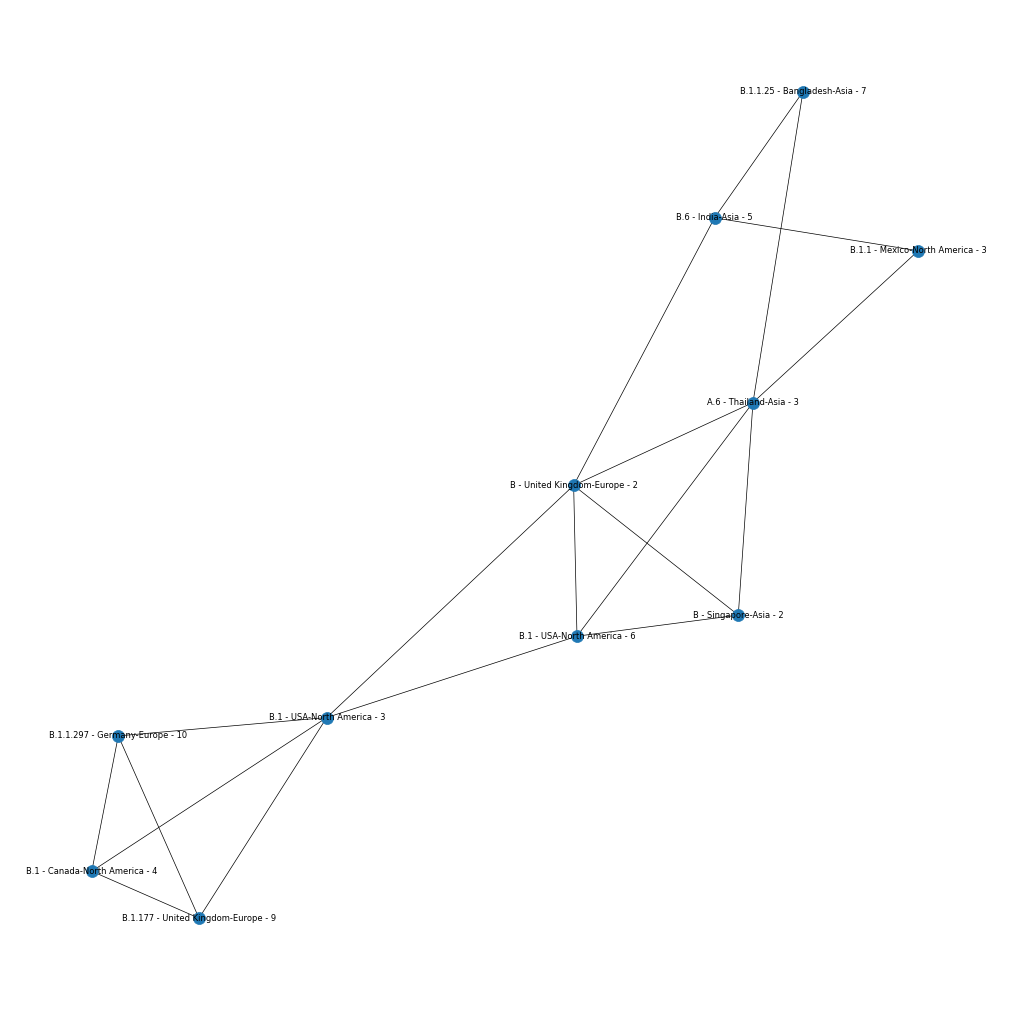

In [17]:
meta = pd.read_csv(path + 'metadata.tsv',sep = '\t')

edgelist = pd.DataFrame(edges)
edgelist.columns = ['source','target']

# combine edgelist and meta to add date
meta.columns = ['source','source_gen']
conneted_sequences = pd.merge(edgelist,meta, on = ['source'])
meta.columns = ['target','target_gen']
conneted_sequences = pd.merge(conneted_sequences,meta, on = ['target'])

gd = pd.read_csv(path + 'guide.csv')

edgelist_node = edgelist
edgelist_node['target'] = edgelist_node['target'].map(gd.set_index('id')['name'])
edgelist_node['source'] = edgelist_node['source'].map(gd.set_index('id')['name'])

G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist_node)
fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_spring(G, with_labels=True)

In [18]:
ref_sars = open('ref_sars','r').read()

In [66]:
from Bio.Align import substitution_matrices
## GENETIC CHANGES
vars_all  = pd.DataFrame()
mut_rate  = []
for target in score_matrix.index :
    st = seq_dataset[target]
    sr = ref_sars
    aligner = Align.PairwiseAligner()

    aligner.mode = 'global'

    aligner.match_score = 2
    aligner.mismatch_score = -1
    aligner.open_gap_score = -0.5
    aligner.extend_gap_score = -0.1
    aligner.target_end_gap_score = -0.1
    aligner.query_end_gap_score = -0.1

    alignments = aligner.align(sr, st)
    alignment = str(alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]


    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    V = vars[vars.pos > 240]
    vars = V[V.pos < 29000]

    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , meta[meta.target == target]['target'].values[0] ])
vars_all = pd.DataFrame(vars_all)
vars_all.to_csv('./data/align/SARS-CoV-2 200.csv')

/tmp/ipykernel_1092578/381547348.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1092578/381547348.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1092578/381547348.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1092578/381547348.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1092578/381547348.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [ ]:
sr = open('ref_sars','r').read()
st = open('tmp1','r').read()
len(st)

In [70]:
from Bio.Align import substitution_matrices
aligner = Align.PairwiseAligner()

aligner.mode = 'global'

aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1
aligner.target_end_gap_score = -0.1
aligner.query_end_gap_score = -0.1

alignments = aligner.align(sr, st)
alignment = str(alignments[0]).split('\n')
ref_bases = [char for char in alignment[0]] 
tar_bases = [char for char in alignment[2]] 
pos = [ i for i in range(len(alignment[2])) ]


vars = [ref_bases, tar_bases, pos]
vars = pd.DataFrame(vars).T
vars.columns = ['ref','tar','pos']
vars = vars.loc[vars.ref != vars.tar ,:]
V = vars[vars.pos > 240]
vars = V[V.pos < 29000]
vars

,ref,tar,pos
3036,C,T,3036
3046,G,T,3046
7107,C,T,7107
9810,-,N,9810
9811,-,N,9811
9812,C,-,9812
9813,T,-,9813
12748,C,A,12748
14409,C,T,14409
20743,A,C,20743


3036     7
14407    5
23402    5
8781     3
1058     3
        ..
24046    1
20133    1
9597     1
4389     1
24676    1
Name: pos, Length: 77, dtype: int64

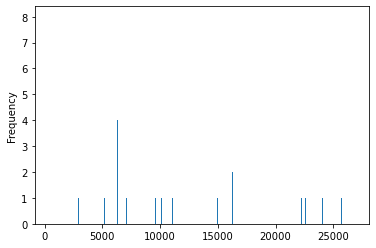

In [19]:
vars_all = pd.read_csv('./data/align/SARS-CoV-2 200.csv', index_col=0)

V = vars_all
V = V[V.pos > 200]
vars = V[V.pos < 27500]

ax = vars.pos.plot(kind='hist',bins = 1000)
var_c = vars.pos.value_counts()
var_c

In [20]:
MutR = MutR.fillna(0)
MutR.f = MutR.r / MutR.d
MutR.f.median()

NameError: name 'MutR' is not defined

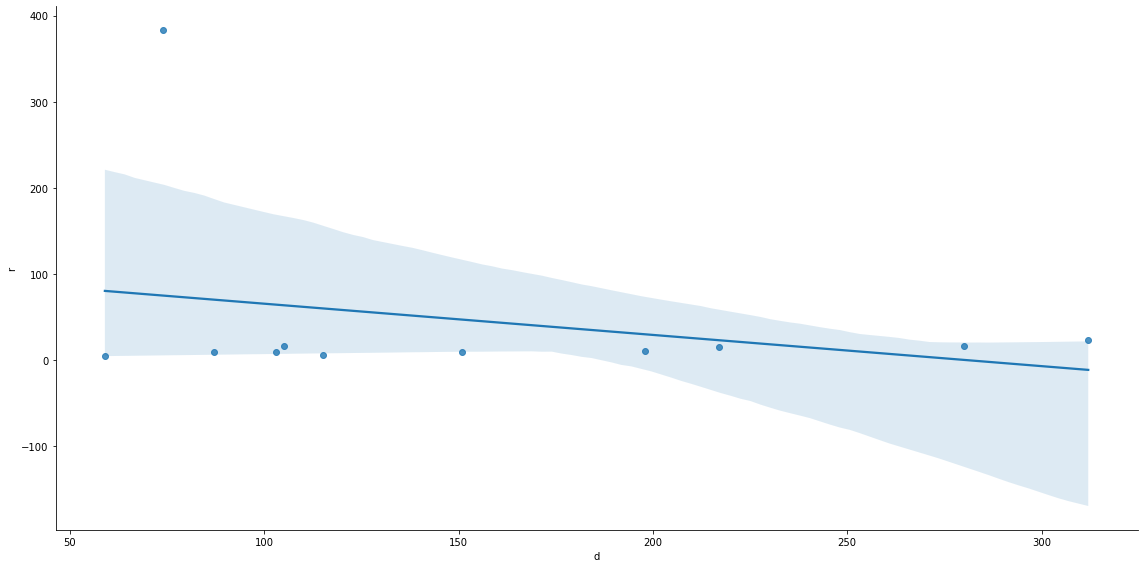

In [75]:
Mut_rate = pd.DataFrame(mut_rate)
Mut_rate.index = Mut_rate[1]
meta.index = meta.target
MutR = pd.concat([Mut_rate, meta], axis=1).iloc[:,[0,-1]]
# MutR
MutR.columns = ['r','d']

sns.lmplot(data=MutR, x="d", y="r", x_jitter=.05, height=8, aspect=2);


In [15]:
version = 'SARS-CoV-2 2020'
V.to_csv( './data/'+version+'/vars_all.csv')

mut_rate_all = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate_all.to_csv( './data/simulation_dataset/vars_'+version+'.csv')

# weighted network

'hCoV_19_Germany_NW_HHU_321_2020'

In [84]:
## GENETIC CHANGES
network  = []
mut_rate  = []
vars_all = []
c = 0
for pair in conneted_sequences.iterrows() :
    c += 1
    sr = seq_dataset[pair[1][0]]
    st = seq_dataset[pair[1][1]]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/"+version+ str( str(pair[1][0]) + str(pair[1][1]) ) )
    #  vars.shape[0] nb mutation
    # pair[1][2] - pair[1][3] # gen diff
    V = vars[vars.pos > 200]
    vars = V[V.pos < 28500]
    # mut_rate.append([vars.shape[0] , abs(int(pair[1][2]) - int(pair[1][3])) ])
    network.append( [pair[1][0] , pair[1][1], vars.shape[0]] )
    print(c)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


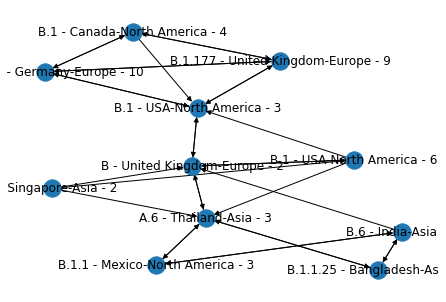

In [85]:
NT = pd.DataFrame(network)
NT.columns = ['s','t','w']


gd = pd.read_csv(path + 'guide.csv')
edgelist_node = edgelist
NT['s'] = NT['s'].map(gd.set_index('id')['name'])
NT['t'] = NT['t'].map(gd.set_index('id')['name'])

G = nx.from_pandas_edgelist(NT,'s','t', edge_attr='w', create_using=nx.DiGraph())
nx.draw_kamada_kawai(G, with_labels=True)


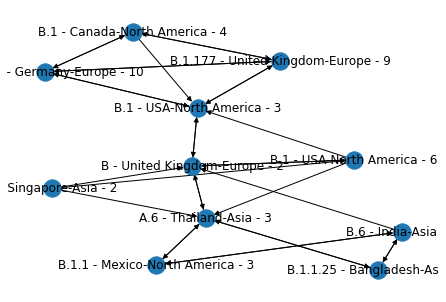

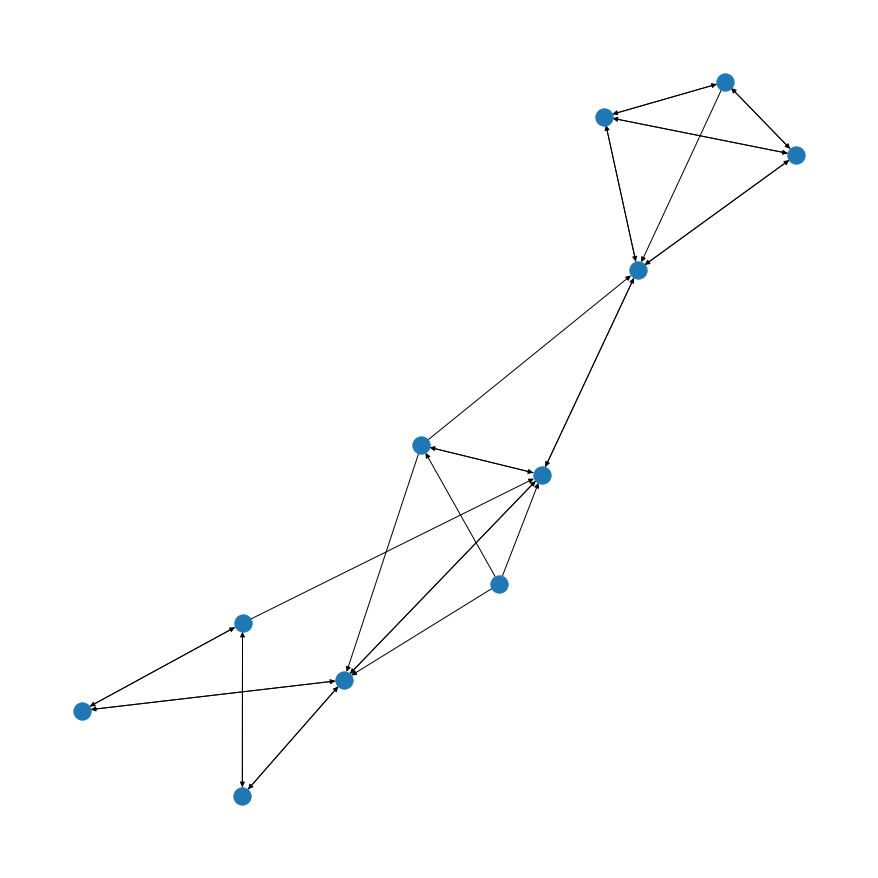

In [86]:
NT = pd.DataFrame(network)
NT.columns = ['s','t','w']


gd = pd.read_csv(path + 'guide.csv')
edgelist_node = edgelist
NT['s'] = NT['s'].map(gd.set_index('id')['name'])
NT['t'] = NT['t'].map(gd.set_index('id')['name'])

G = nx.from_pandas_edgelist(NT,'s','t', edge_attr='w', create_using=nx.DiGraph())
nx.draw_kamada_kawai(G, with_labels=True)

# larger figure size
plt.figure(3,figsize=(12,12)) 
nx.draw(G)
plt.show()

In [88]:
vars_all

[]

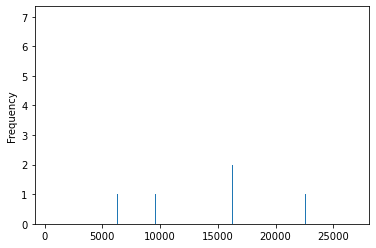

In [54]:
vars_all = pd.read_csv('./data/align/SARS-CoV-2 200.csv', index_col=0)

V = vars_all
V = V[V.pos > 200]
vars = V[V.pos < 27500]

ax = vars.pos.plot(kind='hist',bins = 2750)
var_c = vars.pos.value_counts()
plt.savefig("or.svg")


In [22]:

from Bio import pairwise2
from Bio import Align
import scipy
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def reverse_map(lst):
    new_list = []
    while len(lst):
        e = lst.pop()
        e = str(int(e)).replace('0','A').replace('1','C').replace('2','G').replace('3','T').replace('4','-')
        new_list.append(e)
    return new_list



In [41]:

Var = vars[vars.pos > 2750]
di = dict({'A':0,'C':1,'G':2,'T':3, '-':4})
Var.ref = Var['ref'].map(di)
Var.tar = Var['tar'].map(di)
Var.pos = Var['pos']
Var = Var.dropna(how = 'any', axis = 0)
X = Var[['ref','pos']]
y = Var[['tar']]
X

/tmp/ipykernel_15735/3889319249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Var.ref = Var['ref'].map(di)
/tmp/ipykernel_15735/3889319249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Var.tar = Var['tar'].map(di)
/tmp/ipykernel_15735/3889319249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,ref,pos
8781,1,8781
18487,3,18487
23604,3,23604
3036,1,3036
14407,1,14407
...,...,...
20743,0,20743
23404,0,23404
23588,2,23588
24675,1,24675


In [42]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X, y)

/tmp/ipykernel_15735/158897380.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X, y)


RandomForestClassifier()

In [49]:
c = 0
seq = ref_sars
#right 
c+=1
seqs = []
n_gen = 12 * 3
new_seq = seq
sim_muts = []
for gen in range(n_gen):
    # 0.03 per day => 1 per month
    for gen2 in range(n_gen):
        L= len(new_seq)
        N = 1
        mu, std = scipy.stats.norm.fit(np.array(vars_all['pos'], dtype=int) )
        pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
        refs = []
        for p in pos :
            refs.append(new_seq[int(p)])
        X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
        X_test['ref'] = X_test['ref'].map(di)
        y_pred = randomforest.predict(X_test)
        y_Pred = reverse_map(list(y_pred))
        y_Pred

        for i in range(len(pos)):
            p = int(pos[i])
            new_seq = new_seq[:p] + y_Pred[i] + new_seq[p+1:] # insert new mutated base in sequence
            seqs.append(new_seq)
            sim_muts.append([p, y_Pred[i]])
        print(pos)

[21388.4625277]
[21014.55343817]
[29379.26183431]
[17269.11376159]
[19425.92223212]
[29667.86203911]
[12816.30788783]
[23028.12200779]
[14375.43885185]
[27945.3546396]
[24030.61065493]
[28071.22529039]
[18215.27127253]
[21795.74928748]
[28050.51297487]
[22358.27919104]
[16787.83907311]
[2384.26388994]
[29248.92341633]
[21981.22939407]
[20678.2017097]
[20543.03644297]
[19140.40644025]
[23036.59538664]
[20773.20878478]
[22207.0550576]
[19684.65681457]
[12925.16994173]
[19877.27839489]
[26053.03200037]
[21479.35676164]
[19177.83216164]
[28336.83830168]
[20150.52539754]
[22292.38933025]
[23016.97436136]
[22359.53478393]
[15621.90433295]
[26619.39512857]
[24263.57251985]
[13242.09765157]
[23292.26097016]
[26806.25991659]
[19884.80909615]
[24533.36993104]
[18669.0227896]
[16532.37484519]
[22589.33240542]
[26951.62326464]
[13446.57983317]
[27153.80122695]
[23426.39038744]
[27260.97050563]
[26800.04854297]
[27121.62371139]
[25984.36729624]
[23367.19373151]
[26878.72998353]
[28247.65897631]
[24

In [50]:
Sim_muts = pd.DataFrame(sim_muts, columns = ['pos','mut'])

In [51]:
Sim_muts

,pos,mut
0,21388,G
1,21014,C
2,29379,-
3,17269,G
4,19425,C
...,...,...
1291,20251,C
1292,25267,-
1293,16018,-
1294,16312,T


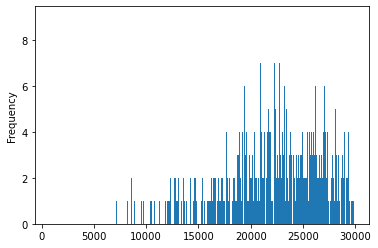

In [55]:
# ax = Sim_muts.pos.plot(kind='hist',bins = 1000)
vars = Sim_muts
ax = vars.pos.plot(kind='hist',bins = 1000)
# ax = vars.pos.plot(kind='density')
var_c = vars.pos.value_counts()
var_c
plt.savefig("mu.svg")
